<img src="./xwing.jpg">

# X-wing miniatures game Analysis

### Table of contents:
1. <a href="#Introduction">Introduction</a>
2. <a href="#DataGoals">Data goals</a>
3. <a href="#DataProcessing">Data processing</a>
4. <a href="#DataVisualisation">Data visualisation</a>
5. <a href="#Summary">Summary</a>

## <a id="Introduction">1. Introduction</a>

For this project I decided to combine two things I greatly enjoy - data analysis and one of my hobbies, which is playing **X-wing miniatures game**. This way the analysis I conducted was both inspiring and enjoyable for me and hopefully it will be an interesting journey for you as well.

First of all I need to explain what exactly is X-wing, and how do you play miniatures games in general. I will try to make it as brief and simple as possible.

As you can read on <a href ="https://xwing-miniatures-second-edition.fandom.com/wiki/X-Wing_Miniatures:_Second_Edition_Wiki">**X-Wing Miniatures: Second Edition Wiki**</a>:
<blockquote>X-Wing Miniatures is a tactical table-top game where players fly Star Wars ships against each other, including X-Wings, TIE Fighters, the Millennium Falcon, TIE Defenders, and many others. Combat is very focused on planning and positioning, as well as building a great squadron in advance.</blockquote>




If you feel intrigued already at this point, you can check the <a href = "https://xwing-miniatures-second-edition.fandom.com/wiki/General_Rules">**detailed rules**</a> on wiki. For our analysis we will need to explain only several main elements of the game:

- Game is divided into **turns**, and every turn is divided into **phases**. To simplify things we will focus on two main phases - **movement phase** (called "activation phase"), where players move their ships on the battlefield and **engagement phase**, where players choose an available target and shoot at it with his own ships.
- Players <font color = red>**ATTACK**</font> and <font color = green>**DEFEND**</font> using two sets of dices
- <font color = red>**ATTACK**</font> dices have results:
   - hit (succesful outcome)
   - critical hit
   - focus
   - blank (no effect/miss)
- <font color = green>**DEFENSE**</font> dices have results:
   - evade (succesful outcome)
   - focus
   - blank
- For simplification of this analysis **critical hit = hit** (basic outcome is the same)
- **FOCUS** outcome is a value that can be either positive ("flipped" to hit during attack or to evade during defense) or negative (blank). There are multiple abilities and effects that allows player to flip focus outcome.
- During attack one player rolls <font color = red>**ATTACK**</font> dices, while defending player rolls <font color = green>**DEFENSE**</font> dices (amount of dices depends on ship and additional cards and abilities). Succesful defense outcomes (evades) negate succesful offensive outcomes (hits). Remaining hits deal damage.
- Ships have **shield** and/or **hull** - "health bar" of the ship - the number which indicates how much damage ship can resist. If damage taken equals shield+hull value, the ship is destroyed and taken out from the battlefield
- Every ship is worth certaing amount of points.
- Every player has a fleet that is worth 200 points total
- Maximal amount of ships in players fleet is 8
- Players score half the points of the ship if they take half of it's "health bar", and full amount if they destroy the ship
- Whoever have more points after 75 minutes wins

There are additional abilities and cards (that cost points) which can impact the course of the game in many ways. Those additional factors however are not only too detailed, but not all of them carry valuable information. Including them into analysis would create data noise and overcomplicate things to the point, where core information can be lost. This is why I decided to skip them entirely, focusing on the basics.

## <a id="DataGoals">2. Data goals</a>

For this analysis I have chosen a match between two experienced x-wing players - **Dion Morales** and **William Haigwood**. If you are interested in game itself and would like to see how it actually looks like you can find it <a href="https://youtu.be/h1Oz6y-TIhE">**HERE**</a>. The game was played online via Tabletop Simulator (environment created to simulate real time tabletop and miniatures games, which came out to be really handy during pandemic).

As for my methodology: I decided to focus only on direct combat that happened during the game, so basically - dices (and everything that comes with them). I prepared excel sheet, where I put down every shot made by a ship, results rolled on dices, dices modified by players (focus flipped), damage done, ships destroyed etc. All of this divided into single ships and single turns. This was my main data sheet. I created two additional ones as well - one with basic information about players and their fleets, and one with points they scored during the game.

Looking at the amount of information I expect those spreadsheets to be a little bit messy, so we will have to clean this data to get the core, relevant information. But what is the core information we need?

Knowing the game already I would like to see following tables:
1. Information table by ship
2. Data by category of information collected, per player, per turn
3. Data by category of information collected, per ship - all turns summed up
4. Data by category of information collected, per player - all turns summed up
5. Points scored by players in time

Those information will allow me to create following charts:
1. Line chart of Points scored by players in time
2. Bar chart of selected statistical data by Players
3. Pie charts of selected statistical data by Players
4. Bar charts of selected statistical data by ships
5. Line chart of Damage in turns with additional data that can corelate with it (rolls and flips)

## <a id="DataProcessing">3. Data processing</a>

Let's take a look into basic information first - this will tell us a little bit more about what we are dealing with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
xwingInfo = pd.read_excel('./x-wing_data.xlsx', sheet_name='Arkusz2', index_col='Ship')
xwingInfo

,Player,Color,Initiative,Type,Pilot,First blood,First points
Ship,,,,,,,
ship 1,Dion Morales,Blue,3.0,T-70 X-Wing,Red Squadron Expert,NaN,NaN
ship 2,Dion Morales,Green,3.0,T-70 X-Wing,Red Squadron Expert,NaN,NaN
ship 3,Dion Morales,Red,3.0,T-70 X-Wing,Red Squadron Expert,NaN,NaN
ship 4,Dion Morales,Yellow,3.0,T-70 X-Wing,Red Squadron Expert,NaN,NaN
ship 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship 9,William Haigwood,NaN,3.0,HWK-290 Light Freighter,Kanan Jarrus,NaN,NaN


The spreadsheet I created was meant to be universal, and since ship amount cap is 8 per player, table was created for 16 ships. As we can see only 7 ships were in the game this time, which means we can **get rid of the rest of them** to keep our data more clear.
We will also like to **join Pilot name with a color**, since those two values combined are direct description of a single ship (colors in x-wing are added to distinguish pilots, if they happen to have the same name).
We will also **get rid of remaining NaN values**.

In [3]:
#dropping empty rows and filling NaN values
xwingInfo.dropna(how='all',inplace=True)
xwingInfo.fillna(value='',inplace=True)
#combining columns if there is available information about color of the ship
xwingInfo['PilotColor'] = np.where(xwingInfo['Color']!='',xwingInfo['Pilot']+' - '+xwingInfo['Color'],xwingInfo['Pilot'])
xwingInfo.drop(columns=['Color','Pilot'],inplace=True)
xwingInfo

,Player,Initiative,Type,First blood,First points,PilotColor
Ship,,,,,,
ship 1,Dion Morales,3.0,T-70 X-Wing,,,Red Squadron Expert - Blue
ship 2,Dion Morales,3.0,T-70 X-Wing,,,Red Squadron Expert - Green
ship 3,Dion Morales,3.0,T-70 X-Wing,,,Red Squadron Expert - Red
ship 4,Dion Morales,3.0,T-70 X-Wing,,,Red Squadron Expert - Yellow
ship 9,William Haigwood,3.0,HWK-290 Light Freighter,,,Kanan Jarrus
ship 10,William Haigwood,6.0,Fang Fighter,yes,,Fenn Rau
ship 11,William Haigwood,4.0,YV-666 Light Frighter,,yes,Bossk


Now we have our basic info table. Although index ship description doesn't have desired form yet, we will leave it be for now - it will serve as a key during cleaning main data sheet.

Let's jump into our main course - data collected ingame.

In [4]:
xwingShipsTurn = pd.read_excel('./x-wing_data.xlsx', sheet_name='Arkusz1')
xwingShipsTurn

,TURN,Category,Factor,ship 1,ship 2,ship 3,ship 4,ship 5,ship 6,ship 7,...,ship 9,ship 10,ship 11,ship 12,ship 13,ship 14,ship 15,ship 16,Sum 2,Sum ALL
0,1,RANGE,range 0 shots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,RANGE,range 1 shots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1,RANGE,range 2 shots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1,RANGE,range 3 shots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1,OBSTRUCT,unobstructed shots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,16,REROLL DEFENSIVE,evade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
476,16,FOCUS FLIPS,to hit/crit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2
477,16,FOCUS FLIPS,to evade,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
478,16,DENIED,HITS DENIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


As expected - this looks like a mess. Since data was collected per turn, we have lots of NaN values in this sheet (first few turns are always "quiet", when players try to set up best position for attack).
We will need to clean it up a bit.

First of all we need to **get rid of redundant ships and NaN values** again (this time let's fill NaN with zeroes since all categories are value-oriented). We will also **drop Sum columns** - we won't need them in this analysis at this form. Sum will be added later on to desired tables.

We also want our data to be **described by both Category and Factor** instead of default numeric index.

Lastly we will **name our coulmns by ships name and color** from xwingInfo table, and convert all data to integer format.

Because our new created category will be repetitive (per turn), I decided to **convert it into 'category' type** to optymalise size of the dataframe table.

In [5]:
xwingShipsTurn.dropna(axis=1,how='all',inplace=True)
xwingShipsTurn.drop(columns=['Sum 1','Sum 2','Sum ALL'], inplace=True)
xwingShipsTurn.insert(loc=1, column='GeneralCategory', value=xwingShipsTurn.Category+': '+xwingShipsTurn.Factor)
xwingShipsTurn.set_index('GeneralCategory',inplace=True)
xwingShipsTurn.drop(columns=['Category','Factor'],inplace=True)
xwingShipsTurn.fillna(value=0, inplace=True)
xwingShipsTurn.index = xwingShipsTurn.index.astype('category')

#renaming columns with pilot names
for i in xwingShipsTurn.columns:
    if i in xwingInfo.index:
        xwingShipsTurn.rename(columns={i:xwingInfo['PilotColor'][i]}, inplace=True)

for i in xwingShipsTurn.columns:
    xwingShipsTurn[i] = xwingShipsTurn[i].astype('int')
    
xwingShipsTurn

,TURN,Red Squadron Expert - Blue,Red Squadron Expert - Green,Red Squadron Expert - Red,Red Squadron Expert - Yellow,Kanan Jarrus,Fenn Rau,Bossk
GeneralCategory,,,,,,,,
RANGE: range 0 shots,1,0,0,0,0,0,0,0
RANGE: range 1 shots,1,0,0,0,0,0,0,0
RANGE: range 2 shots,1,0,0,0,0,0,0,0
RANGE: range 3 shots,1,0,0,0,0,0,0,0
OBSTRUCT: unobstructed shots,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
REROLL DEFENSIVE: evade,16,0,0,0,0,0,0,0
FOCUS FLIPS: to hit/crit,16,0,0,0,0,0,2,0
FOCUS FLIPS: to evade,16,0,0,1,0,0,0,0


Now it looks much better. We have the table containing values in specific categories gathered by ships per turn.

We won't need our data to be that detailed though. Let's **sum this all up** to single categories.

In [6]:
#creating data for new table as dictionary
sData = {}
sIndex = xwingShipsTurn.index.unique()
sColumns = xwingShipsTurn.drop(columns='TURN').columns
for i in sColumns:
    sData[i] = [xwingShipsTurn[xwingShipsTurn.index == j][i].sum() for j in sIndex]
    
xwingShipsSum = pd.DataFrame(index=sIndex, columns=sColumns, data=sData)
xwingShipsSum

,Red Squadron Expert - Blue,Red Squadron Expert - Green,Red Squadron Expert - Red,Red Squadron Expert - Yellow,Kanan Jarrus,Fenn Rau,Bossk
GeneralCategory,,,,,,,
RANGE: range 0 shots,0,0,0,0,0,0,0
RANGE: range 1 shots,2,0,1,1,4,2,5
RANGE: range 2 shots,0,2,3,3,3,4,0
RANGE: range 3 shots,0,1,2,1,2,1,0
OBSTRUCT: unobstructed shots,2,3,6,5,9,7,5
OBSTRUCT: obstructed shots,0,0,0,0,0,0,0
DAMAGE DONE: shields taken,2,2,1,0,0,9,2
DAMAGE DONE: hull taken,0,2,3,6,9,3,4
DAMAGE DONE: ships taken,0,0,1,0,2,1,1


Perfect. Now let's return to the xwingInfo table to finally **correct our index**.

In [7]:
xwingInfo.set_index('PilotColor',inplace=True)
xwingInfo

,Player,Initiative,Type,First blood,First points
PilotColor,,,,,
Red Squadron Expert - Blue,Dion Morales,3.0,T-70 X-Wing,,
Red Squadron Expert - Green,Dion Morales,3.0,T-70 X-Wing,,
Red Squadron Expert - Red,Dion Morales,3.0,T-70 X-Wing,,
Red Squadron Expert - Yellow,Dion Morales,3.0,T-70 X-Wing,,
Kanan Jarrus,William Haigwood,3.0,HWK-290 Light Freighter,,
Fenn Rau,William Haigwood,6.0,Fang Fighter,yes,
Bossk,William Haigwood,4.0,YV-666 Light Frighter,,yes


The next table we will need is **Data by category of information collected, per player, per turn**. We will use xwingInfo table again to decide which ship belongs to which player.

Let's also **add SUM column** here - this will help us finding out basic dependencies and correlations later on.

In [8]:
#creating empty dataframe
xwingPlayersTurn = pd.DataFrame(index=xwingShipsTurn.index, columns=[])
#adding TURN column
xwingPlayersTurn['TURN']=xwingShipsTurn['TURN']

#adding column for each Player and filling them with sum values of their ships
for i in xwingInfo['Player'].unique():
    xwingPlayersTurn[i] = sum([xwingShipsTurn[j] for j in xwingShipsTurn.columns.drop('TURN') if xwingInfo.loc[j]['Player'] == i])

#adding SUM column
xwingPlayersTurn['SUM'] = xwingPlayersTurn['Dion Morales']+xwingPlayersTurn['William Haigwood']
xwingPlayersTurn

,TURN,Dion Morales,William Haigwood,SUM
GeneralCategory,,,,
RANGE: range 0 shots,1,0,0,0
RANGE: range 1 shots,1,0,0,0
RANGE: range 2 shots,1,0,0,0
RANGE: range 3 shots,1,0,0,0
OBSTRUCT: unobstructed shots,1,0,0,0
...,...,...,...,...
REROLL DEFENSIVE: evade,16,0,0,0
FOCUS FLIPS: to hit/crit,16,0,2,2
FOCUS FLIPS: to evade,16,1,0,1


Now let's **sum this table up** as well.

In [9]:
xwingPlayersSum = pd.DataFrame(index=xwingShipsSum.index, columns=[])
for i in xwingInfo['Player'].unique():
    xwingPlayersSum[i] = sum([xwingShipsSum[j] for j in xwingShipsSum.columns if xwingInfo.loc[j]['Player'] == i])
    
xwingPlayersSum

,Dion Morales,William Haigwood
GeneralCategory,,
RANGE: range 0 shots,0,0
RANGE: range 1 shots,4,11
RANGE: range 2 shots,8,7
RANGE: range 3 shots,4,3
OBSTRUCT: unobstructed shots,16,21
OBSTRUCT: obstructed shots,0,0
DAMAGE DONE: shields taken,5,11
DAMAGE DONE: hull taken,11,16
DAMAGE DONE: ships taken,1,4


The last table missing is **Points scored by players in time**.

In [10]:
xwingPoints=pd.read_excel('./x-wing_data.xlsx', sheet_name='Arkusz3')
xwingPoints

,min left,Dion Morales,William Haigwood
0,75,0.0,0.0
1,74,NaN,NaN
2,73,NaN,NaN
3,72,NaN,NaN
4,71,NaN,NaN
...,...,...,...
71,4,NaN,NaN
72,3,NaN,NaN
73,2,NaN,NaN
74,1,NaN,NaN


During the game I only wrote down in which minute to which value player's score changed. Because score remains the same untill the next change, we will **fill NaN values by value that was present before (ffill method)**.

We will also **convert all values to integer format** and **drop min left column**, index happenes to be exact set of values that we need (from 0 to 75 minutes).

In [11]:
xwingPoints.fillna(method='ffill',inplace=True)
xwingPoints.drop(columns=['min left'],inplace=True)
for i in xwingPoints.columns:
    xwingPoints[i] = xwingPoints[i].astype('int')
xwingPoints

,Dion Morales,William Haigwood
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
71,106,175
72,106,175
73,106,175
74,106,175


This is all data we need. Now we can finally proceed to Data visualisation phase.

## <a id="DataVisualisation">4. Data visualisation</a>

With our prepared tables we can now start visualise some information collected. As you remember the goal of the game is to score more points than your oponent (in 75 minutes match). Let's start with checking which player won this game:

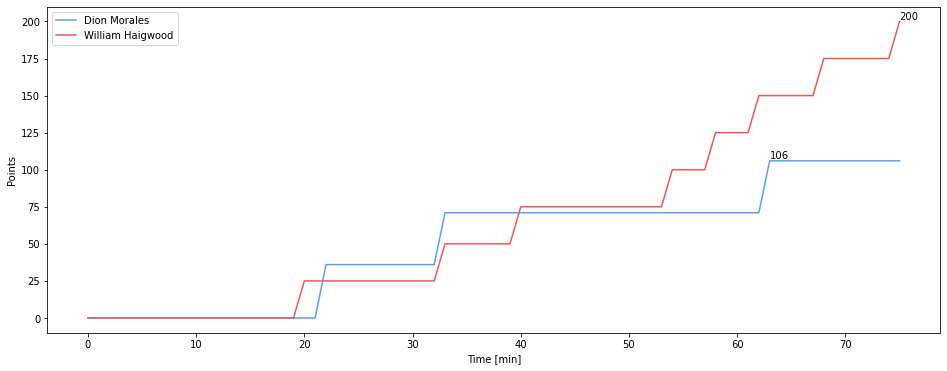

In [12]:
plt.figure(figsize=(16,6))
plt.plot(xwingPoints.index, xwingPoints['Dion Morales'], label='Dion Morales', color='#54a2f0')
plt.plot(xwingPoints.index, xwingPoints['William Haigwood'], label='William Haigwood', color='#ee5852')
plt.legend(loc='upper left')
plt.xlabel('Time [min]')
plt.ylabel('Points')
#highlighting maximal values
plt.annotate(xwingPoints['Dion Morales'].max(), (xwingPoints['Dion Morales'].idxmax() , xwingPoints['Dion Morales'].max()), va='bottom')
plt.annotate(xwingPoints['William Haigwood'].max(), (xwingPoints['William Haigwood'].idxmax() , xwingPoints['William Haigwood'].max()), va='bottom')
plt.show()

William Haigwood was the victor that day, scoring maximal possible amount of points: 200. That means that he destroyed all of the oponents fleet. Quite impressive.

Now when we know the outcome of this match, let's check some basic statistics for our players, including **rolls and their outcomes**, **rolls category** and **focus flipped** (focus results modified for positive outcome). Let's also have a look at specific **ships offensive statistics** and how effective they turned out to be in the game.

Since Hits value depends on number of offensive rolls, and Damage done value depends on the Hits value, let's also create three new factors and visualise them on the **ships effectiveness chart**:
- Efficiency (Hits to Offensive rolls ratio) [%]
- Acccuracy (Damage done to Hits ratio) [%]
- Total impact (Damage done to Offensive rolls ratio) [%]

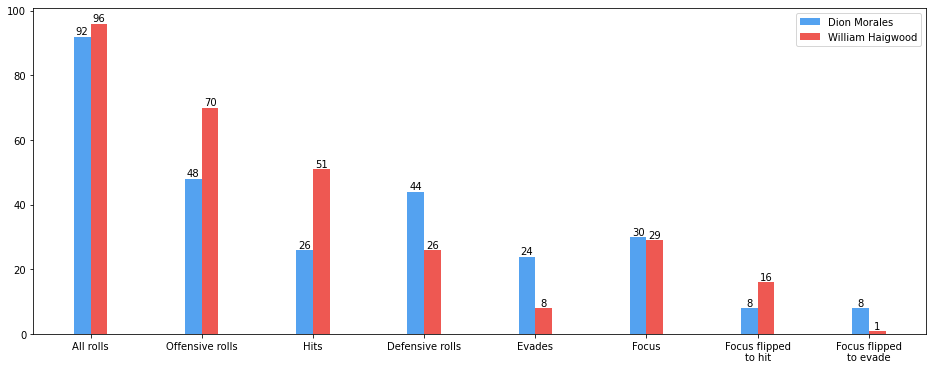

In [13]:
from textwrap import wrap

statLabels = ['All rolls','Offensive rolls','Hits','Defensive rolls','Evades', 'Focus', 'Focus flipped to hit', 'Focus flipped to evade']
#wrapping too long labels
statLabels = ['\n'.join(wrap(i, 15)) for i in statLabels]
DionStats = [xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['Dion Morales'].sum() + xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.query('GeneralCategory.str.contains("hit") or GeneralCategory.str.contains("crit")', engine='python')['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='evade',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='focus',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='to hit',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='to evade',axis=0)['Dion Morales'].sum()]
WilliamStats = [xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['William Haigwood'].sum() + xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.query('GeneralCategory.str.contains("hit") or GeneralCategory.str.contains("crit")', engine='python')['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='evade',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='focus',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='to hit',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='to evade',axis=0)['William Haigwood'].sum()]
w = .15
x = np.arange(len(statLabels))

plt.figure(figsize=(16, 6))
plt.bar(x-w/2, DionStats, w, label='Dion Morales',color='#54a2f0')
plt.bar(x+w/2, WilliamStats, w, label='William Haigwood',color='#ee5852')
plt.legend(loc='upper right')
plt.xticks(x,statLabels)
#inserting value labels
for i in range(len(statLabels)):
    plt.text(i-w/2, DionStats[i],DionStats[i],ha='center',va='bottom',size=10)
    plt.text(i+w/2, WilliamStats[i],WilliamStats[i],ha='center',va='bottom',size=10)

plt.show()

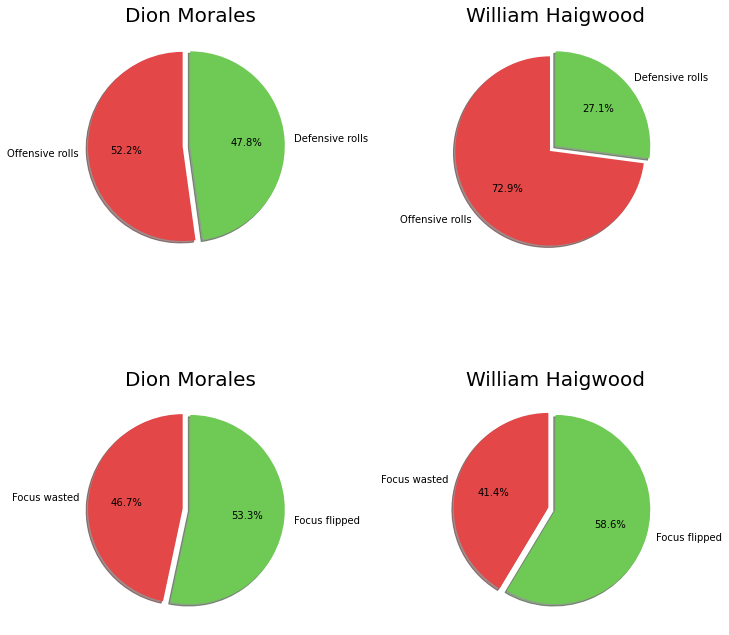

In [14]:
pieLabels1 = ['Offensive rolls', 'Defensive rolls']
pieLabels2 = ['Focus wasted','Focus flipped']
DionRolls = [xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['Dion Morales'].sum(),
             xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['Dion Morales'].sum()]
WilliamRolls = [xwingPlayersSum.filter(like='OFFENSIVE',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='DEFENSIVE',axis=0)['William Haigwood'].sum()]
DionFlips =[xwingPlayersSum.filter(like='focus',axis=0)['Dion Morales'].sum()-xwingPlayersSum.filter(like='FOCUS',axis=0)['Dion Morales'].sum(),
            xwingPlayersSum.filter(like='FOCUS',axis=0)['Dion Morales'].sum()]
WilliamFlips = [xwingPlayersSum.filter(like='focus',axis=0)['William Haigwood'].sum()-xwingPlayersSum.filter(like='FOCUS',axis=0)['William Haigwood'].sum(),
                xwingPlayersSum.filter(like='FOCUS',axis=0)['William Haigwood'].sum()]
explode = [0.08,0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), constrained_layout = True)
ax1.pie(DionRolls, explode=explode, labels=pieLabels1, colors=['#e34747','#6eca54'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Dion Morales', fontsize=20)
ax2.pie(WilliamRolls, explode=explode, labels=pieLabels1, colors=['#e34747','#6eca54'], autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('William Haigwood', fontsize=20)
ax3.pie(DionFlips, explode=explode, labels=pieLabels2, colors=['#e34747','#6eca54'], autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title('Dion Morales', fontsize=20)
ax4.pie(WilliamFlips, explode=explode, labels=pieLabels2, colors=['#e34747','#6eca54'], autopct='%1.1f%%', shadow=True, startangle=90)
ax4.set_title('William Haigwood', fontsize=20)
plt.show()

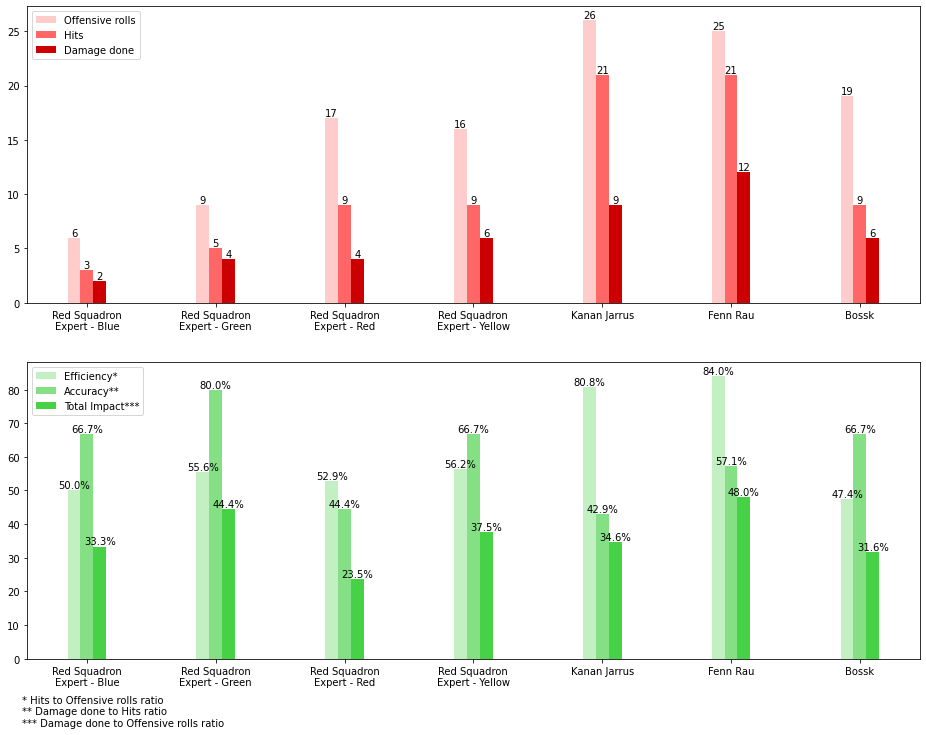

In [15]:
shipsLabels = xwingShipsSum.columns
#wrapping too long labels
sLabels = ['\n'.join(wrap(i, 15)) for i in shipsLabels]
shipsOffensive = np.array([xwingShipsSum.filter(like='OFFENSIVE', axis=0)[i].sum() for i in xwingShipsSum.columns])
shipsHits = np.array([xwingShipsSum.query('GeneralCategory.str.contains("hit") or GeneralCategory.str.contains("crit")', engine='python')[i].sum() for i in xwingShipsSum.columns])
shipsDamage = np.array([xwingShipsSum.loc[['DAMAGE DONE: shields taken','DAMAGE DONE: hull taken']][i].sum() for i in xwingShipsSum.columns])
sOffensiveMean =[shipsOffensive.mean() for i in sLabels]
sHitsMean = [shipsHits.mean() for i in sLabels]
sDamageMean = [shipsDamage.mean() for i in sLabels]
shipsEfficiency = shipsHits/shipsOffensive*100
shipsAccuracy = shipsDamage/shipsHits*100
totalImpact=shipsDamage/shipsOffensive*100

w = .1
x = np.arange(len(sLabels))

fig, (ax1,ax2) = plt.subplots(2, figsize = (16,12))
ax1.bar(x-w, shipsOffensive, w, label='Offensive rolls',color='#ffcccc')
ax1.bar(x, shipsHits, w, label='Hits',color='#ff6666')
ax1.bar(x+w, shipsDamage, w, label='Damage done', color='#cc0000')
ax1.legend(loc='upper left')
ax1.set_xticks(x)
ax1.set_xticklabels(sLabels)
for i in range(len(x)):
    ax1.text(i-w, shipsOffensive[i],shipsOffensive[i], ha='center',va='bottom', size=10)
    ax1.text(i, shipsHits[i],shipsHits[i],ha='center', va='bottom', size=10)
    ax1.text(i+w, shipsDamage[i],shipsDamage[i],ha='center', va='bottom', size=10)

ax2.bar(x-w, shipsEfficiency, w, label = 'Efficiency*', color='#c2f0c2')
ax2.bar(x, shipsAccuracy, w, label = 'Accuracy**', color='#85e085')
ax2.bar(x+w,totalImpact,w, label = 'Total Impact***', color="#47d147")
ax2.legend(loc='upper left')
ax2.text(-0.5,-20,'* Hits to Offensive rolls ratio\n** Damage done to Hits ratio\n*** Damage done to Offensive rolls ratio')
ax2.set_xticks(x)
ax2.set_xticklabels(sLabels)
for i in range(len(x)):
    ax2.text(i-w, shipsEfficiency[i],str(round(shipsEfficiency[i],1))+'%', ha='center',va='bottom', size=10)
    ax2.text(i, shipsAccuracy[i],str(round(shipsAccuracy[i],1))+'%',ha='center', va='bottom', size=10)
    ax2.text(i+w, totalImpact[i],str(round(totalImpact[i],1))+'%',ha='center', va='bottom', size=10)

plt.show()

The last chart I want to present is **Total damage done in turns**. Our goal is to check which parameters affects the course of the graph though, so we will add some additional plots. As you already know the core of the game is rolling dices - every engagement depends on them so there is always luck involved. This doesn't mean that players are helpless. There are several things that they can control or modify:
- number of dices (depending on position and additional ingame cards and abilities)
- focus flips (modifying focus results to your advantage)
- positioning (finding an angle, where you can shoot the enemy, but he can't shoot back)

First two factors are countable, so we can easily show them on a graph.

Let's go back to the basics for a moment. Evade results on <font color = green>**DEFENSE**</font> dices can negate Hits results on <font color = red>**ATTACK**</font> dices. So one <font color = green>**DEFENSE**</font> dice have potential to negate one <font color = red>**ATTACK**</font> dice. Instead of counting overall offense dices value, let's focus on how many **MORE** dices than your opponent do you need (**offensive rolls - defensive rolls**).

Second factor was similar to define. Focus flips tells us how many focus results was modified to succesfull results. Because evades negate htis I decided to use differential value as well (**focus flipped to hits - focus flipped to evade**).

In the last chart I presented the **mean graph of those two values**, to see how they both correspond with total damage done graph.

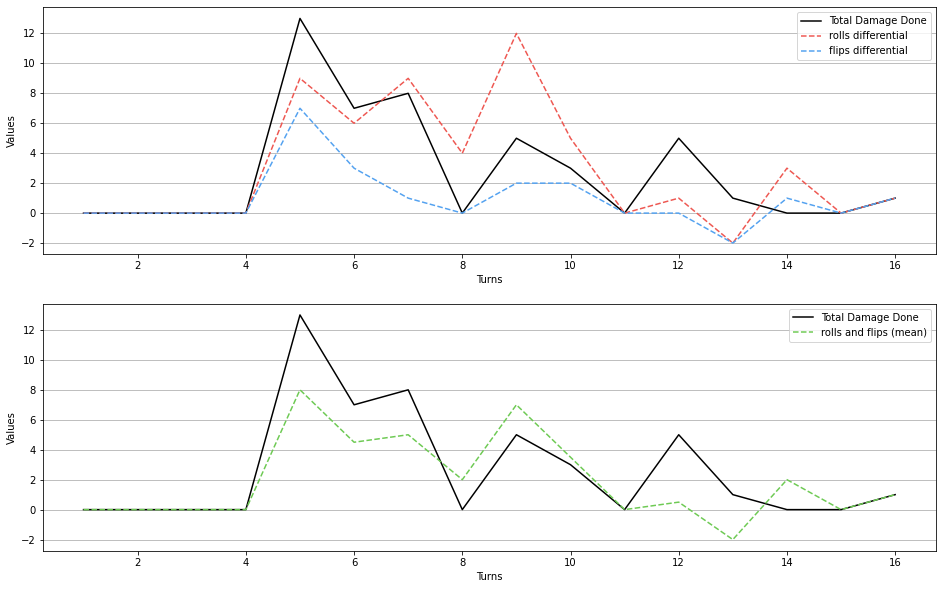

In [16]:
xOFF = xwingPlayersTurn.filter(like='OFFENSIVE', axis=0)
xDEF = xwingPlayersTurn.filter(like='DEFENSIVE', axis=0)
offensiveRolls=np.array([xOFF[xOFF['TURN']==i]['SUM'].sum() for i in xwingPlayersTurn['TURN'].unique()])
defensiveRolls=np.array([xDEF[xDEF['TURN']==i]['SUM'].sum() for i in xwingPlayersTurn['TURN'].unique()])
TurnAxis = xwingPlayersTurn['TURN'].unique()
Damage = xwingPlayersTurn.loc['DAMAGE DONE: shields taken']['SUM'].values + xwingPlayersTurn.loc['DAMAGE DONE: hull taken']['SUM'].values
flipsHit = xwingPlayersTurn.loc['FOCUS FLIPS: to hit/crit']['SUM'].values
flipsEvade = xwingPlayersTurn.loc['FOCUS FLIPS: to evade']['SUM'].values
rollDiff = offensiveRolls-defensiveRolls
flipDiff = flipsHit - flipsEvade
allFactorsMean = (rollDiff+flipDiff)/2
w = .35

fig, (ax1,ax2) = plt.subplots(2, figsize = (16,10))
ax1.grid(True,axis='y')
ax1.plot(TurnAxis, Damage, 'k-', label='Total Damage Done')
ax1.plot(TurnAxis, rollDiff, '--', label='rolls differential',color='#ee5852')
ax1.plot(TurnAxis, flipDiff, '--', label='flips differential',color='#54a2f0')
ax1.legend(loc='upper right')
ax1.set(xlabel='Turns', ylabel='Values')
ax2.grid(True,axis='y')
ax2.plot(TurnAxis, Damage, 'k-', label='Total Damage Done')
ax2.plot(TurnAxis, allFactorsMean, '--', label='rolls and flips (mean)',color='#6eca54')
ax2.legend(loc='upper right')
ax2.set(xlabel='Turns', ylabel='Values')
plt.show()

## <a id="Summary">5. Summary</a>

As we can see from presented charts, William's fleet turned out to be really offensive this game. He managed to find **upper hand in engagements**, outrolling oponent 70 to 48 in terms of offensive rolls (almost 73% of all of his rolls this game). Out of those 70 rolls he had 51 hits, 16 of which happened because of **focus results flipped to positive outcome**.

The MVP of this game was pilot named **Fenn Rau**. He had the highest impact of all of the ships, converting nearly half of all offensive rolls into direct damage.

The mean graph of rolls differential and flips differential presents similar characteristic to total damage done graph. As expected, the **number of dices and ability to modify them corelate with damage you can do**, and thus on number of points you can score.

This was just one match. With enough data damage impact graphs may show more corelation, or maybe we would be able to determine which factor is more important. Hopefully with tools available and experience gained after this analysis, next step will be easily achievable. And maybe the knowledge I gained after conducted analysis will help me to become a better player. Fingers crossed.

This small analysis was not as detailed at it could be (hopefully this made it more clear and understandable), I tried to focus on basics while also presenting and improving my skilss in data processing and cleaning and data visualisation.

Hope you enjoyed it.